# Problem 1
In this problem I'm going to 
- calculate **PCA** for some datapoints
- **project** the datapoints on the PCA line
- **reconstruct** the initial datapoints based on the transformed datapoints by the PCA

To show code and it's results I used jupyter notebook and python language to implement this project.

In [2]:
# Some initializations
%matplotlib inline
import numpy as np
np.random.seed(123132)

### Part a: creating the initial data
In this part I created the datapoints (two Gaussian distributions) based on given `mu1`, `mu2` and `sigma` vectors.

In [ ]:
sampleCount = 1000
mu1 = np.array([10, 10])
mu2 = np.array([22, 10])
sigma = np.array([[4, 4], [4, 9]])

firstSample = np.array(np.random.multivariate_normal(mu1, sigma, sampleCount))
secondSample = np.array(np.random.multivariate_normal(mu2, sigma, sampleCount))
sampleData = np.concatenate((firstSample, secondSample), axis=0)


#### Plotting the initial datapoints

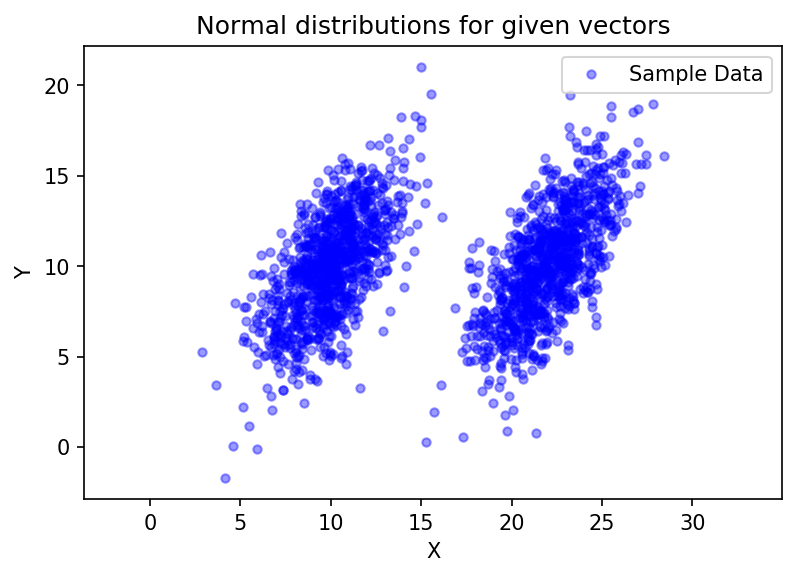

In [61]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 150

plt.plot(sampleData[:, 0], sampleData[:, 1], 'o', markersize=4, color='blue', alpha=0.4, label='Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Normal distributions for given vectors')

plt.show()

### Part b: computing PCA
In this section I provide a method called `computePCA` for computing the **PCA** of a dataset, then we compute the PCA of our data in `sampleData` matrice.

In [ ]:
from sklearn.decomposition import PCA

def computePCA(dataset, components=2):
    pca = PCA(components)
    pca.fit(dataset)
    return pca

pca = computePCA(sampleData)


#### PCA Drawing
Here I provide a method called `drawPCA` wich gets a `pca` object as input and draws its components. 


In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def drawPCA(pca):
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)


#### Plotting the data with PCA
Here I used `drawPCA` function to draw the calculated PCA and the datapoints together.

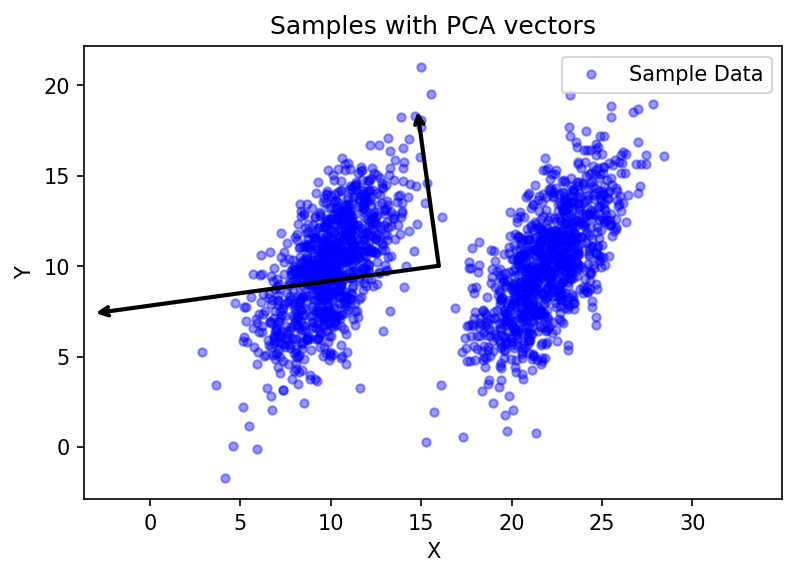

In [64]:
plt.plot(sampleData[:,0], sampleData[:,1], 'o', markersize=4, color='blue', alpha=0.4, label='Sample Data')

drawPCA(pca)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Samples with PCA vectors')
plt.show()

#### Creating one component PCA to project datapoints on
Here I projected the datapoints on one of the PCA's component (its main component).

In [ ]:
linePca = computePCA(sampleData, 1)

projectedLine = linePca.inverse_transform(linePca.transform(sampleData))

plt.plot(sampleData[:, 0], sampleData[:, 1], 'o', color='blue', alpha=0.1, label='Sample data')
plt.plot(projectedLine[:, 0], projectedLine[:, 1], 'o', markersize=4, color='red', alpha=0.4, label='Data projected on PCA')
drawPCA(pca)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Samples projected to a PCA vector')
plt.show()


#### Reconstructing the datapoints based on the two component PCA
I transformed the original datapoints based on the two component PCA to a new space using the `transform` function.
Then I reconstructed the data using the `inverse_transform` function. 

In [ ]:
transformedData = pca.transform(sampleData)
reconstructedData = pca.inverse_transform(transformedData)

### Plotting the reconstructed data

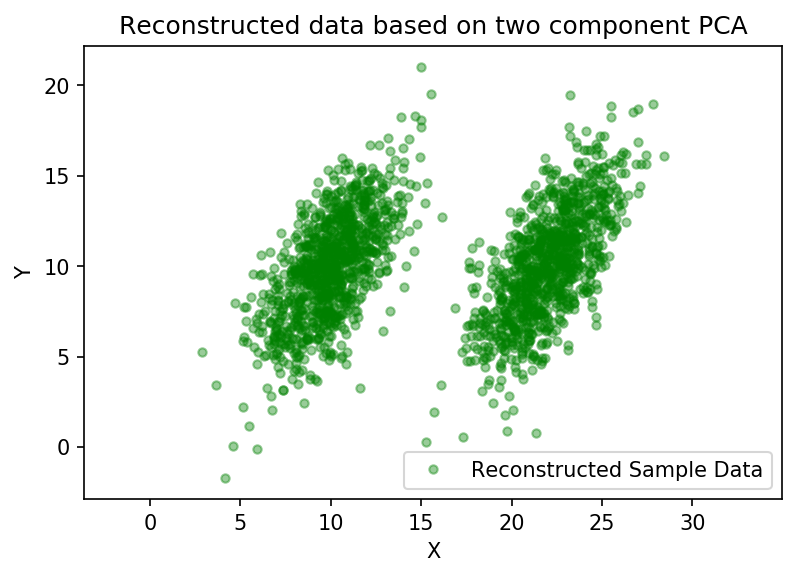

In [72]:
from matplotlib import pyplot as plt

plt.plot(reconstructedData[:, 0], reconstructedData[:, 1], 'o', markersize=4, color='green', alpha=0.4, label='Reconstructed Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Reconstructed data based on two component PCA')

plt.show()

### Computing the errors of reconstruction of the data

In [ ]:
loss = ((sampleData - reconstructedData) ** 2).mean()
print("Reconstruction error -> " + str(loss))